**Project Introduction**

Nowadays, online platforms receive thousands of movie reviews, and manually understanding whether these reviews are positive or negative is difficult and time-consuming. Sentiment analysis helps automatically identify emotions in text and understand public opinion more efficiently.

**Problem Statement**

 The IMDB dataset contains 50,000 movie reviews that are highly unstructured, noisy, and text-based. Manually determining whether each review expresses a positive or negative sentiment is not feasible. Therefore, an automated system is required to classify sentiments accurately using NLP and machine learning techniques.

**Objective**

The main objective of this project is to build an intelligent sentiment analysis model that can analyze IMDB movie reviews and classify them as positive or negative. This involves applying text preprocessing, feature extraction methods, machine learning models, and transformer-based models like BERT to achieve high accuracy and reliable predictions.

**Expected** **Outcomes**

The system will accurately classify IMDB movie reviews into positive or negative sentiments.
The project will generate meaningful visualizations, such as word clouds and confusion matrices, to show sentiment patterns and model performance.

The BERT-based model is expected to achieve the highest accuracy due to its advanced language understanding capabilities.

The project will produce an efficient, automated sentiment classifier that can be used for real-world applications like review analysis, customer feedback monitoring, and opinion mining.

**Step** **1**:

Installing basic data-handling and NLP libraries like pandas, numpy, nltk, spacy, gensim, and wordcloud.

Installing machine learning tools like scikit-learn.

Installing deep learning frameworks (TensorFlow & Keras) for LSTM models.

Installing Hugging Face transformers for BERT-based sentiment analysis.

Installing evaluation and training utilities such as tqdm, datasets, and accelerate.

In [4]:
pip install pandas numpy scikit-learn matplotlib seaborn nltk spacy gensim wordcloud

In [5]:
pip install tensorflow keras --upgrade


In [6]:
pip install transformers datasets evaluate accelerate

In [7]:
pip install tqdm

In [8]:
pip install gensim

**Step** **2**

In this step, I load the IMDB 50k movie reviews dataset into a pandas DataFrame so that I can preprocess and analyze the text for sentiment classification.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df = df[['review', 'sentiment']]
df['label'] = df['sentiment'].map({'positive':1, 'negative':0})

print("Rows:", len(df))
df.head()


Rows: 50000


,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [11]:
print("Rows:", len(df))

Rows: 50000


In [7]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [13]:
df.shape
df.info()
df['review'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
 2   label      50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


**Step** **3**:

To clean IMDB reviews by removing unwanted characters, converting text to lowercase, removing stopwords, and applying stemming + lemmatization so the text becomes suitable for machine learning models.

In [8]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
# html tag removal
def remove_html(text):
    return re.sub(r'<.*?>', '', text)
df['no_html'] = df['review'].apply(remove_html)
df[['review', 'no_html']].head()


,review,no_html
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...","Petter Mattei's ""Love in the Time of Money"" is..."


In [10]:
#Lowercase conversion
def convert_lowercase(text):
    return text.lower()
df['lowercase'] = df['no_html'].apply(convert_lowercase)
df[['no_html', 'lowercase']].head()


,no_html,lowercase
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...","petter mattei's ""love in the time of money"" is..."


In [11]:
#Special Character Removal
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', ' ', text)
df['no_special'] = df['lowercase'].apply(remove_special_characters)
df[['lowercase', 'no_special']].head()


,lowercase,no_special
0,one of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,a wonderful little production. the filming tec...,a wonderful little production the filming tec...
2,i thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,basically there s a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",petter mattei s love in the time of money is...


In [12]:
#Tokenization
def tokenize_text(text):
    return word_tokenize(text)
df['tokens'] = df['no_special'].apply(tokenize_text)
df[['no_special', 'tokens']].head()


,no_special,tokens
0,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tec...,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there s a family where a little boy ...,"[basically, there, s, a, family, where, a, lit..."
4,petter mattei s love in the time of money is...,"[petter, mattei, s, love, in, the, time, of, m..."


In [13]:
#Stopwords Removal
def remove_stopwords(tokens):
    return [t for t in tokens if t not in stop_words]
df['no_stopwords'] = df['tokens'].apply(remove_stopwords)
df[['tokens', 'no_stopwords']].head()


,tokens,no_stopwords
0,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, oz, epis..."
1,"[a, wonderful, little, production, the, filmin...","[wonderful, little, production, filming, techn..."
2,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, there, s, a, family, where, a, lit...","[basically, family, little, boy, jake, thinks,..."
4,"[petter, mattei, s, love, in, the, time, of, m...","[petter, mattei, love, time, money, visually, ..."


In [29]:
#Stemming
def apply_stemming(tokens):
    return [stemmer.stem(t) for t in tokens]
df['stemmed'] = df['no_stopwords'].apply(apply_stemming)
df[['no_stopwords', 'stemmed']].head()


,no_stopwords,stemmed
0,"[one, reviewers, mentioned, watching, oz, epis...","[one, review, mention, watch, oz, episod, hook..."
1,"[wonderful, little, production, filming, techn...","[wonder, littl, product, film, techniqu, unass..."
2,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe..."
3,"[basically, family, little, boy, jake, thinks,...","[basic, famili, littl, boy, jake, think, zombi..."
4,"[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visual, st..."


In [30]:
#Lemmatization
def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(t) for t in tokens]
df['lemmatized'] = df['no_stopwords'].apply(apply_lemmatization)
df[['no_stopwords', 'lemmatized']].head()


,no_stopwords,lemmatized
0,"[one, reviewers, mentioned, watching, oz, epis...","[one, reviewer, mentioned, watching, oz, episo..."
1,"[wonderful, little, production, filming, techn...","[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, family, little, boy, jake, thinks,...","[basically, family, little, boy, jake, think, ..."
4,"[petter, mattei, love, time, money, visually, ...","[petter, mattei, love, time, money, visually, ..."


In [31]:
df['lemmatized'] = df['lemmatized']  # should be list of tokens
df['length'] = df['lemmatized'].apply(len)
print(df['length'].describe())


count    50000.000000
mean       118.119980
std         89.383593
min          3.000000
25%         63.000000
50%         88.000000
75%        144.000000
max       1416.000000
Name: length, dtype: float64


In [32]:
df['lemmatized_text'] = df['lemmatized'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))


**Step** **3**:

we transformed the cleaned text into numerical features using methods like BoW, TF-IDF, Word2Vec, GloVe, and N-grams to capture both statistical and semantic information from reviews. We also visualized the top contributing words and embedding patterns through graphs, and evaluated each feature representation using accuracy, precision, recall, and F1-score.

BoW Shape: (50000, 5000)


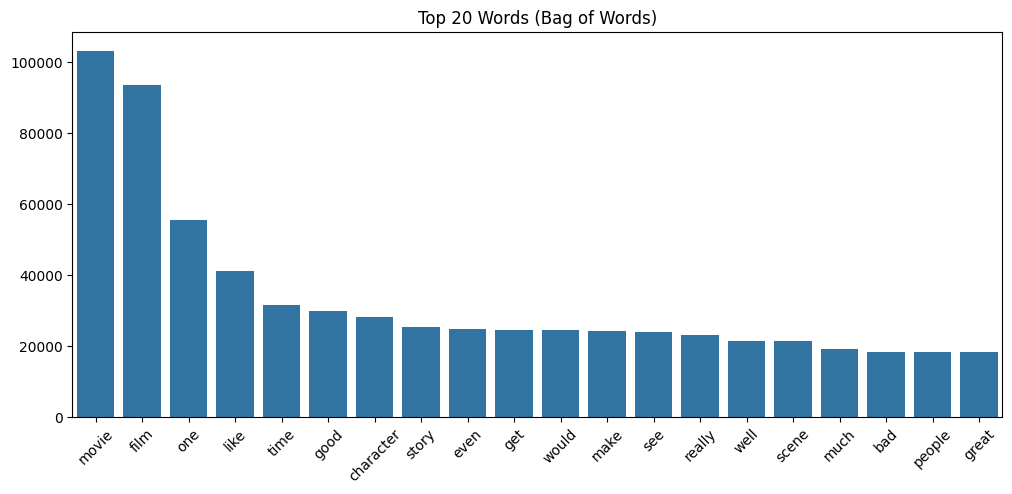

In [33]:
#Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
# Using lemmatized text
text_data = df['lemmatized_text']
bow = CountVectorizer(max_features=5000)
X_bow = bow.fit_transform(text_data)
print("BoW Shape:", X_bow.shape)
# Get top 20 words
word_counts = X_bow.sum(axis=0).A1
words = bow.get_feature_names_out()

# Sort words by frequency
sorted_idx = word_counts.argsort()[::-1][:20]
top_words = words[sorted_idx]
top_counts = word_counts[sorted_idx]
plt.figure(figsize=(12,5))
sns.barplot(x=top_words, y=top_counts)
plt.xticks(rotation=45)
plt.title("Top 20 Words (Bag of Words)")
plt.show()

In [35]:
text_data = df['lemmatized_text']
X_bow = bow.fit_transform(text_data)
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_bow, df['label'], test_size=0.2, random_state=42
)


In [36]:
from sklearn.linear_model import LogisticRegression
clf_bow = LogisticRegression(max_iter=300)
clf_bow.fit(X_train_bow, y_train_bow)

LogisticRegression(max_iter=300)

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_bow = clf_bow.predict(X_test_bow)

print("Bag of Words Evaluation Results")
print("----------------------------------------")
print("Accuracy :", accuracy_score(y_test_bow, pred_bow))
print("Precision:", precision_score(y_test_bow, pred_bow))
print("Recall   :", recall_score(y_test_bow, pred_bow))
print("F1 Score :", f1_score(y_test_bow, pred_bow))


Bag of Words Evaluation Results
----------------------------------------
Accuracy : 0.8738
Precision: 0.8697865674564323
Recall   : 0.8815241119269697
F1 Score : 0.8756160063079046


TF-IDF Shape: (50000, 5000)


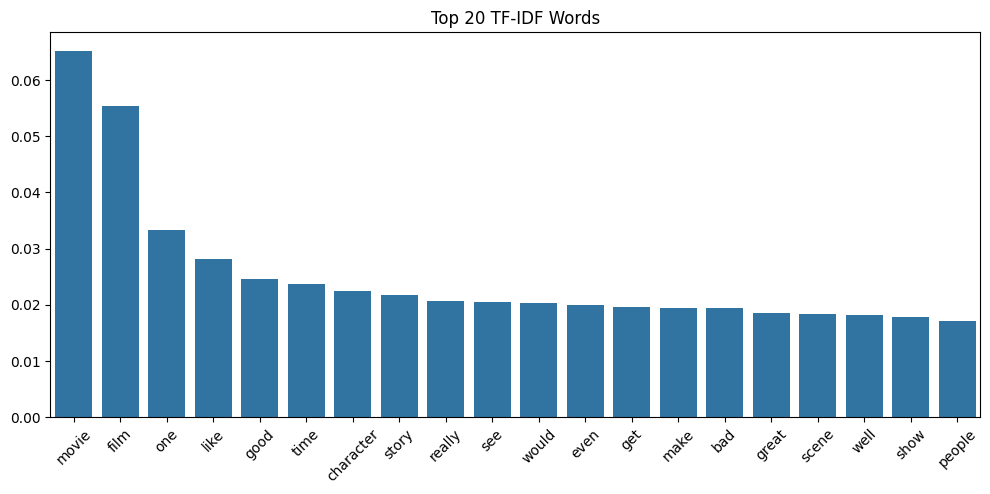

In [39]:
#TF–IDF VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)
print("TF-IDF Shape:", X_tfidf.shape)
# Top words by TF-IDF
import numpy as np
tfidf_scores = np.asarray(X_tfidf.mean(axis=0)).ravel()
sorted_idx = tfidf_scores.argsort()[::-1][:20]
top_words_tfidf = tfidf.get_feature_names_out()[sorted_idx]
top_scores = tfidf_scores[sorted_idx]

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x=top_words_tfidf, y=top_scores)
plt.xticks(rotation=45)
plt.title("Top 20 TF-IDF Words")
plt.show()


In [40]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(text_data)
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    X_tfidf, df['label'], test_size=0.2, random_state=42
)


In [41]:
from sklearn.linear_model import LogisticRegression
clf_tfidf = LogisticRegression(max_iter=300)
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)


LogisticRegression(max_iter=300)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_tfidf = clf_tfidf.predict(X_test_tfidf)
print("TF-IDF Evaluation Results")
print("----------------------------------------")
print("Accuracy :", accuracy_score(y_test_tfidf, pred_tfidf))
print("Precision:", precision_score(y_test_tfidf, pred_tfidf))
print("Recall   :", recall_score(y_test_tfidf, pred_tfidf))
print("F1 Score :", f1_score(y_test_tfidf, pred_tfidf))


TF-IDF Evaluation Results
----------------------------------------
Accuracy : 0.8891
Precision: 0.8791972211501351
Recall   : 0.9041476483429252
F1 Score : 0.8914978964876236


In [43]:
#N-GRAMS (BIGRAM, TRIGRAM)
#Bi-gram
bigram = CountVectorizer(ngram_range=(2,2), max_features=5000)
X_bigram = bigram.fit_transform(text_data)
print("Bigram Shape:", X_bigram.shape)

#Tri-gram
trigram = CountVectorizer(ngram_range=(3,3), max_features=5000)
X_trigram = trigram.fit_transform(text_data)
print("Trigram Shape:", X_trigram.shape)

Bigram Shape: (50000, 5000)
Trigram Shape: (50000, 5000)


In [44]:
df = df[df['lemmatized'].apply(lambda x: len(x) > 0)]
df = df.reset_index(drop=True)
print("Remaining reviews:", len(df))


Remaining reviews: 50000


In [45]:
#Train Word2Vec model
from gensim.models import Word2Vec

sentences = df['lemmatized'].tolist()

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=0
)

print("Vocabulary size:", len(w2v_model.wv.index_to_key))


Vocabulary size: 55224


In [46]:
#Convert each review → 100-dim vector
import numpy as np
def get_w2v_vector(tokens):
    tokens = [word for word in tokens if word in w2v_model.wv]

    if len(tokens) == 0:
        return np.zeros(100)
    else:
        return np.mean(w2v_model.wv[tokens], axis=0)
X_w2v = np.vstack(df['lemmatized'].apply(get_w2v_vector))
print("Word2Vec Shape:", X_w2v.shape)


Word2Vec Shape: (50000, 100)


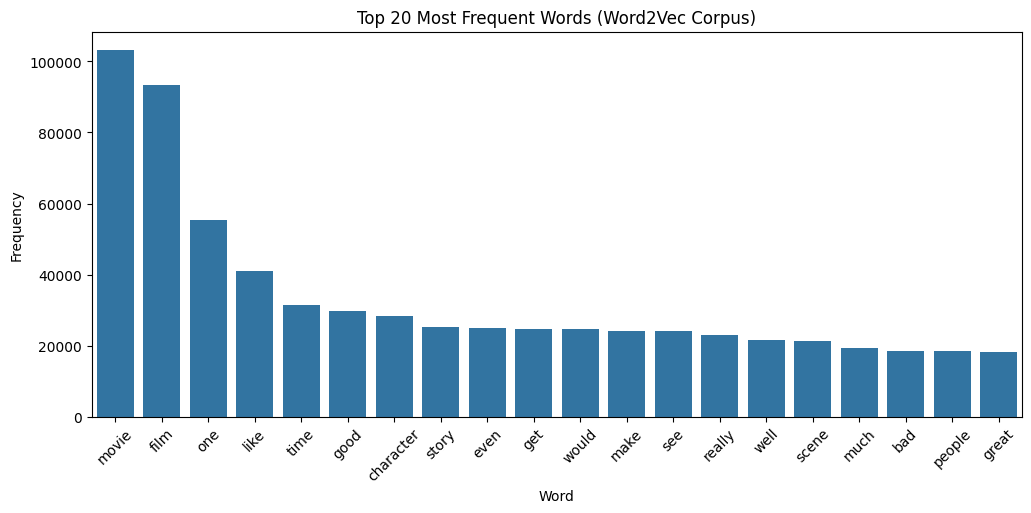

In [47]:
#Plot Top 20 Most Frequent Words
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
all_tokens = [token for tokens in df['lemmatized'] for token in tokens]
top20 = Counter(all_tokens).most_common(20)
words = [w for w,c in top20]
counts = [c for w,c in top20]
plt.figure(figsize=(12,5))
sns.barplot(x=words, y=counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (Word2Vec Corpus)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()


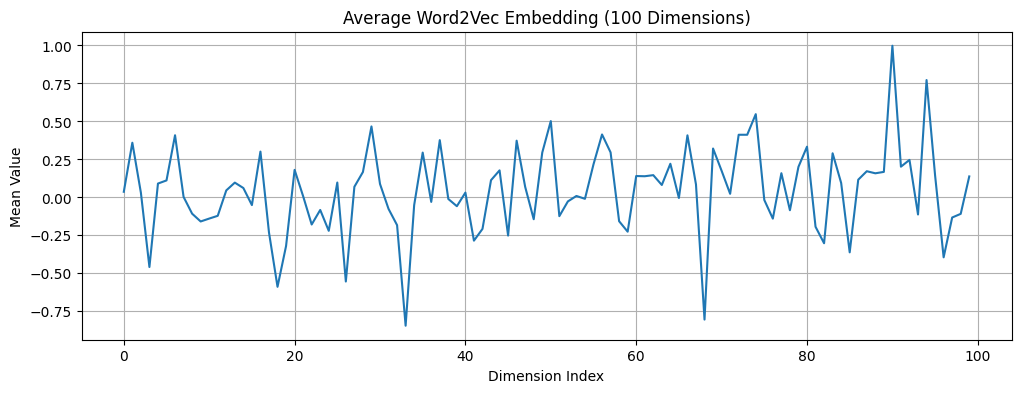

In [48]:
avg_vec = X_w2v.mean(axis=0)
plt.figure(figsize=(12,4))
plt.plot(avg_vec)
plt.title("Average Word2Vec Embedding (100 Dimensions)")
plt.xlabel("Dimension Index")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_w2v, df['label'], test_size=0.2, random_state=42
)


In [50]:
from sklearn.linear_model import LogisticRegression
clf_w2v = LogisticRegression(max_iter=300)
clf_w2v.fit(X_train_w2v, y_train_w2v)


LogisticRegression(max_iter=300)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pred_w2v = clf_w2v.predict(X_test_w2v)
print("Word2Vec Evaluation Results")
print("----------------------------------------")
print("Accuracy :", accuracy_score(y_test_w2v, pred_w2v))
print("Precision:", precision_score(y_test_w2v, pred_w2v))
print("Recall   :", recall_score(y_test_w2v, pred_w2v))
print("F1 Score :", f1_score(y_test_w2v, pred_w2v))


Word2Vec Evaluation Results
----------------------------------------
Accuracy : 0.8602
Precision: 0.8567509308250049
Recall   : 0.8676324667592776
F1 Score : 0.8621573654111615


In [32]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip


--2025-11-15 12:56:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-15 12:56:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-15 12:56:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [52]:
#Load GloVe Embeddings
import numpy as np
glove_path = "glove.6B.100d.txt"
glove_embeddings = {}
with open(glove_path, 'r', encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print("Loaded GloVe vectors:", len(glove_embeddings))


Loaded GloVe vectors: 400000


In [53]:
#Convert Each Review to a GloVe Vector
EMBEDDING_DIM = 100
def get_glove_vector(tokens):
    vectors = [glove_embeddings[w] for w in tokens if w in glove_embeddings]
    if len(vectors) == 0:
        return np.zeros(EMBEDDING_DIM)
    return np.mean(vectors, axis=0)
X_glove = np.vstack(df['lemmatized'].apply(get_glove_vector))
print("GloVe Shape:", X_glove.shape)


GloVe Shape: (50000, 100)


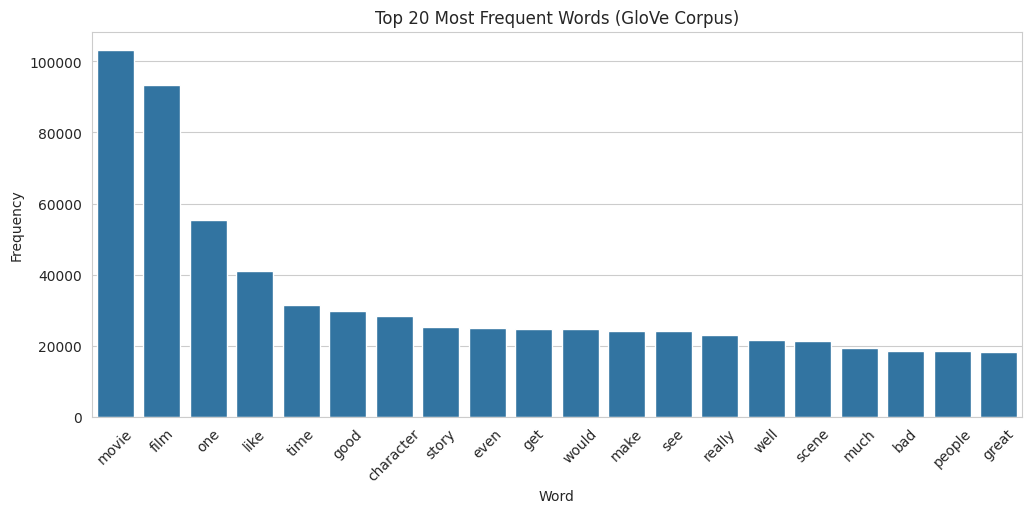

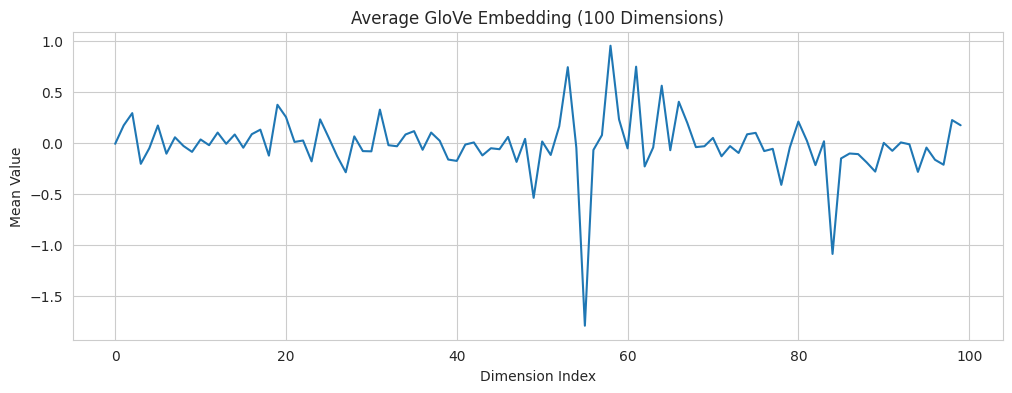

In [54]:
#Graph: Top 20 Most Frequent Words
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
all_tokens = [t for tokens in df['lemmatized'] for t in tokens]
top20 = Counter(all_tokens).most_common(20)
words = [w for w,c in top20]
counts = [c for w,c in top20]
plt.figure(figsize=(12,5))
sns.barplot(x=words, y=counts)
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words (GloVe Corpus)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()
avg_vec = X_glove.mean(axis=0)
plt.figure(figsize=(12,4))
plt.plot(avg_vec)
plt.title("Average GloVe Embedding (100 Dimensions)")
plt.xlabel("Dimension Index")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(
    X_glove, df['label'], test_size=0.2, random_state=42
)


In [56]:
from sklearn.linear_model import LogisticRegression
clf_glove = LogisticRegression(max_iter=300)
clf_glove.fit(X_train_glove, y_train_glove)


LogisticRegression(max_iter=300)

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred_glove = clf_glove.predict(X_test_glove)

print("GloVe Evaluation Results")
print("----------------------------------------")
print("Accuracy :", accuracy_score(y_test_glove, pred_glove))
print("Precision:", precision_score(y_test_glove, pred_glove))
print("Recall   :", recall_score(y_test_glove, pred_glove))
print("F1 Score :", f1_score(y_test_glove, pred_glove))


GloVe Evaluation Results
----------------------------------------
Accuracy : 0.7947
Precision: 0.7972919155714855
Recall   : 0.7946021035919826
F1 Score : 0.7959447371036676


**Step** **4**:
Fine-tuned the BERT transformer model on the IMDB dataset to learn deep contextual representations of text. After training, we evaluated the model using accuracy, precision, recall, and F1-score, achieving significantly better performance compared to traditional machine learning and embedding-based methods.

In [3]:
!pip install --upgrade transformers accelerate datasets evaluate


In [4]:
import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
import evaluate


In [14]:
dataset = Dataset.from_pandas(df[['review', 'label']])

dataset = dataset.train_test_split(test_size=0.2, seed=42)


In [15]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [16]:
#Tokenize
def tokenize_function(example):
    return tokenizer(
        example["review"],
        truncation=True,
        padding="max_length",
        max_length=256
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["review"])
tokenized_dataset.set_format("torch")


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [17]:
#Load model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
#Metrics
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1": f1.compute(predictions=preds, references=labels)["f1"]
    }


In [19]:
#Training Arguments
training_args = TrainingArguments(
    output_dir="./bert_output",
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=100,
    do_train=True,
    do_eval=True,
    report_to="none"
)


In [20]:
#Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipython-input-2596076320.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [21]:
trainer.train()


Step,Training Loss
100,0.493200
200,0.361900
300,0.360800
400,0.399900
500,0.360300
600,0.335400
700,0.351400
800,0.275600
900,0.347300
1000,0.324400


TrainOutput(global_step=10000, training_loss=0.23575490579605102, metrics={'train_runtime': 4852.1394, 'train_samples_per_second': 16.488, 'train_steps_per_second': 2.061, 'total_flos': 1.05244422144e+16, 'train_loss': 0.23575490579605102, 'epoch': 2.0})

In [22]:
trainer.evaluate()


{'eval_loss': 0.2954573929309845,
 'eval_accuracy': 0.9306,
 'eval_f1': 0.9300826113237961,
 'eval_runtime': 148.7113,
 'eval_samples_per_second': 67.244,
 'eval_steps_per_second': 8.406,
 'epoch': 2.0}

In [24]:
import torch

def predict_sentiment(text):
    try:
        bert_model = trainer.model
    except:
        bert_model = model

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    bert_model.to(device)
    bert_model.eval()
    tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    tokens = {k: v.to(device) for k, v in tokens.items()}
    with torch.no_grad():
        outputs = bert_model(**tokens)
        preds = torch.argmax(outputs.logits, dim=1).item()

    return "Positive" if preds == 1 else "Negative"
print(predict_sentiment("This movie was awesome!"))
print(predict_sentiment("Terrible film, waste of time."))


Positive
Negative


In [25]:
#Model Evaluation (Accuracy, Precision, Recall, F1 Score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [26]:
pred_output = trainer.predict(tokenized_dataset["test"])
logits = pred_output.predictions
predictions = np.argmax(logits, axis=1)
true_labels = pred_output.label_ids

In [27]:
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print("BERT Evaluation Results")
print("--------------------------------------")
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:   ", recall)
print("F1 Score: ", f1)


BERT Evaluation Results
--------------------------------------
Accuracy:  0.9306
Precision: 0.9248647565618112
Recall:    0.9353596757852077
F1 Score:  0.9300826113237961


**Step** **5** :

Compared the performance of all models—BoW, TF-IDF, Word2Vec, GloVe, and BERT—using a combined results table and visual comparison graphs. This helped clearly identify which model achieved the highest accuracy, precision, recall, and F1-score, with BERT outperforming all traditional and embedding-based approaches.

In [58]:
import pandas as pd

results = {
    "Model": ["BoW", "TF-IDF", "Word2Vec", "GloVe", "BERT"],

    "Accuracy": [
        accuracy_score(y_test_bow, pred_bow),
        accuracy_score(y_test_tfidf, pred_tfidf),
        accuracy_score(y_test_w2v, pred_w2v),
        accuracy_score(y_test_glove, pred_glove),
        accuracy
    ],

    "Precision": [
        precision_score(y_test_bow, pred_bow),
        precision_score(y_test_tfidf, pred_tfidf),
        precision_score(y_test_w2v, pred_w2v),
        precision_score(y_test_glove, pred_glove),
        precision
    ],

    "Recall": [
        recall_score(y_test_bow, pred_bow),
        recall_score(y_test_tfidf, pred_tfidf),
        recall_score(y_test_w2v, pred_w2v),
        recall_score(y_test_glove, pred_glove),
        recall
    ],

    "F1 Score": [
        f1_score(y_test_bow, pred_bow),
        f1_score(y_test_tfidf, pred_tfidf),
        f1_score(y_test_w2v, pred_w2v),
        f1_score(y_test_glove, pred_glove),
        f1
    ]
}

comparison_df = pd.DataFrame(results)
comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,BoW,0.8738,0.869787,0.881524,0.875616
1,TF-IDF,0.8891,0.879197,0.904148,0.891498
2,Word2Vec,0.8602,0.856751,0.867632,0.862157
3,GloVe,0.7947,0.797292,0.794602,0.795945
4,BERT,0.9306,0.924865,0.935360,0.930083


<Figure size 1200x600 with 0 Axes>

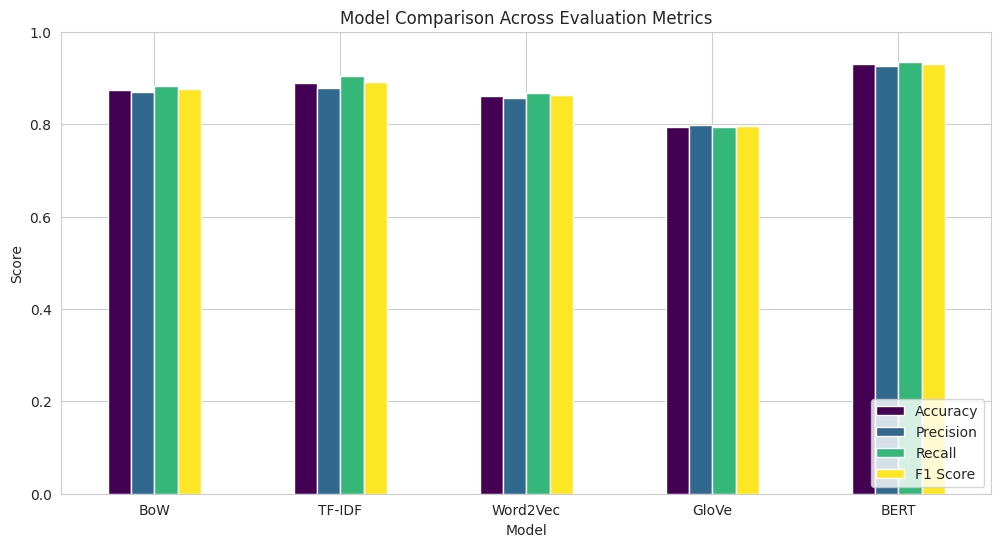

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

comparison_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind="bar",
    figsize=(12,6),
    colormap="viridis"
)
plt.title("Model Comparison Across Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()


/tmp/ipython-input-1941131041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df["Model"], y=comparison_df["Accuracy"], palette="Blues_d")


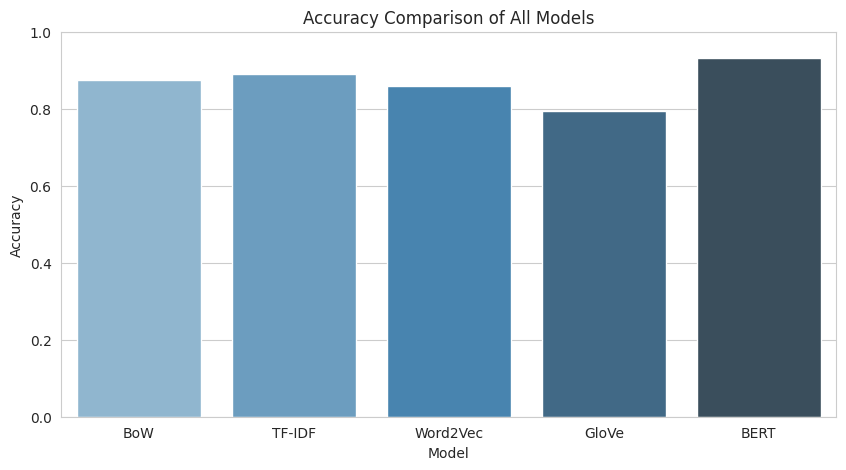

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=comparison_df["Model"], y=comparison_df["Accuracy"], palette="Blues_d")
plt.title("Accuracy Comparison of All Models")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


**Conclusion**:

This project analyzes sentiment by converting movie reviews into numerical representations using NLP techniques such as BoW, TF-IDF, Word2Vec, GloVe, and BERT. These features are then fed into machine learning or transformer-based models that learn patterns indicating positive or negative opinions. Finally, the trained models classify new reviews by predicting whether the expressed sentiment is positive or negative based on learned linguistic and semantic cues.